<a id='top'></a>

# CSCI3022 F20
# Homework 6: Confidence Intervals
***

**Name**: Aanvi Guliani

***

This assignment is due on Canvas by **MIDNIGHT on Monday November 2**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | 
---

In [1]:
import numpy as np
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [20 points] Problem 1 - Random Samples from ANYWHERE


In notebook 12, we looked at one method many pieces of statistical software use to turn pseudorandom numbers coming from the $U(0,1)$ distribution into those with a normal distribution.  In this problem we examine another such method.

### a) Simulating an Exponential
#### i ) The exponential distribution has pdf $f(x)= \lambda e^{-\lambda x}$ for $x\ge 0$.  Use the following markdown cell to compute by hand the cdf of the exponential.

$$
f(x) = \begin{cases}
         \lambda e^{-\lambda x} & x \ge 0 \\
         0                           & \text{otherwise}
       \end{cases}
$$  
The cdf of the function will be:  
$$ F(x) = \int_{0}^{x} f(x)dx$$  
$$ F(x) = \int_{0}^{x} \lambda e^{-\lambda x}dx$$  
Use substitution to integrate:  
$$ u = -\lambda x, du= -\lambda dx \rightarrow dx = \frac{-1}{\lambda}du$$  
Integrate:  
$$ -\int\lambda e^{u}du = -e^u + C$$  
$$F(x) = -e^{-\lambda x} \Big|_0^{x}$$  
$$F(x) = -e^{-\lambda x} - (-e^{-\lambda(0)})$$  
$$F(x) = 1 -e^{-\lambda x}$$  
The CDF is as follows:  
$$
\fbox{F(x) = $\begin{cases}
         1 -e^{-\lambda x} & x \ge 0 \\
         0                           & \text{otherwise}
       \end{cases}$}
$$  

#### ii) The cdf is a function that takes x-values (or times, in the case of the exponential) and returns probabilities as the y-values.  Specifically, it returns the probability $P(X \leq x)$.  Find the *inverse* of this function, that takes as input probabilities and outputs times.

To find the inverse, switch $F^{-1}(x)$ and $x$.
$$x = 1 -e^{-\lambda F^{-1}(x)}$$  
$$e^{-\lambda F^{-1}(x)}= 1-x$$  
$$ln(e^{-\lambda F^{-1}(x)})= ln(1-x)$$  
$$-\lambda F^{-1}(x)= ln(1-x)$$  
$$\fbox{$F^{-1}(x)$= $\frac{-ln(1-x)}{\lambda}$}$$  


#### iii) Simulate 1000 random $U(0,1)$ variables.  Since these are numbers in $[0,1]$, we could think of them as random *probabilities*.  Plug them into the function you found in ii), then plot a histogram of the results.  Overlay the theoretical density of the exponential.  For each of these, use $\lambda=1/4$.

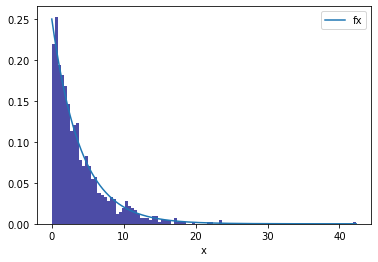

In [2]:
def fInverse(x):
    inverse = - (np.log(1-x)) / (1/4)
    return inverse

def simulate():
    probs = np.random.uniform(0,1,1000)
    vals = np.double(range(1000))
    for i in range(0,len(vals)):
        vals[i] = fInverse(probs[i])
    return vals

arr = simulate()
# create PDF plot - similar code to hw 4
xPlot = np.linspace(0,np.max(arr),1000)
fcnPlot = []
for i in xPlot:
    exp = -0.25*i
    fcnPlot.append((math.e**exp)/4)
df = pd.DataFrame()
df['x'] = xPlot
df['fx'] = fcnPlot
ax = df.plot(x='x',y='fx')

# plot histogtram
plt.hist(arr,bins=100, density=True,color='navy',alpha=0.7)
plt.show()

### b) Simulating a new distribution
#### i) Consider a continuous random variable given by $f(x)=cos(x)$ for $x \in [0, \pi/2]$.  Find the cdf and inverse cdf of X.

$$
f(x) = \begin{cases}
         cos(x) & 0 \leq x \leq \frac{\pi}{2} \\
         0                           & \text{otherwise}
       \end{cases}
$$  
The cdf of the function will be:  
$$ F(x) = \int_{0}^{x} f(x)dx$$   
$$ F(x) = sin(x) \Big|_0^{x}$$  
$$ \fbox{F(x) = sin(x)}$$  
The inverse cdf is:  
$$ \fbox{$F^{-1}$(x) = arcsin(x)}$$


#### ii) Simulate draws from X by simulating 1000 $U[0,1]$ random variables and plugging them into the inverse cdf in i).  As in part a), plot a histogram of the random variables against their density function.

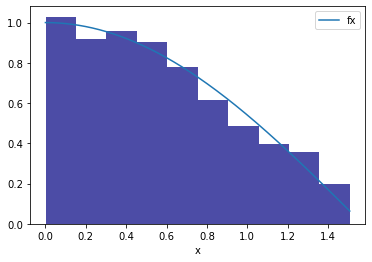

In [3]:
def simulate2():
    piOver2 = math.pi/2
    probs2 = np.random.uniform(0,1,1000)
    for i in range(0,1000):
        if probs2[i] > piOver2:
            print(probs2[i])
    vals2 = np.arcsin(probs2)
    return vals2
arr2 = simulate2()
# create PDF plot - similar code to hw 4
xPlot2 = np.linspace(0,np.max(arr2),1000)
fcnPlot2 = []
for i in xPlot2:
    fcnPlot2.append(math.cos(i))
df2 = pd.DataFrame()
df2['x'] = xPlot2
df2['fx'] = fcnPlot2
ax = df2.plot(x='x',y='fx')

# plot histogtram
plt.hist(arr2,bins=10, density=True,color='navy',alpha=0.7)
plt.show()

### c) Backwards Normals

The process we're following could be summarized as follows, referencing functions we know for many distributions:

- Sample from U(0,1)
- Plug those samples each into the .ppf ("Percentile Point Function," or inverse of the CDF) for the random variable.
- Save the output

Now, follow this process for normal random variables.  Sample 1000 random normal variables using `norm.rvs` and then generate 100 random normal variable by transforming 1000 random variables from their `norm.ppfs`.  Plot both samples in an overlapping histogram.

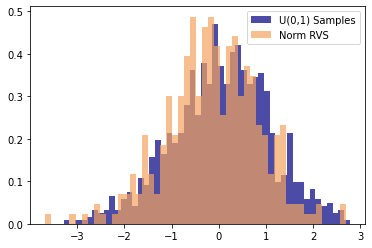

In [14]:
def getPPF():
    normArray = np.random.uniform(0,1,1000)
    return stats.norm.ppf(normArray)
def getNormalVars():
    samples = stats.norm.rvs(size=1000)
    return stats.norm.ppf(samples)

arr3 = getPPF()
arr4 = getNormalVars()
plt.hist(arr3, 50, label='U(0,1) Samples', density=True, color='navy', alpha=0.7)
plt.hist(arr4, 50, label='Norm RVS',density=True, color = 'sandybrown', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

### d) Generalizing

Describe in words how this process might work on a discrete random variable.  It is optional but may be useful to use the Bernoulli as an example or implement this process in code.

**Answer**  
(source MIPS 6.2)  
To generate the Bernoulli distribution, we first set a p-value and sample from $U(0,1)$. If the generated value $u < p$ then $X=1$. Else, $X=0.$ This is shown in the code below with a p-value of 0.4


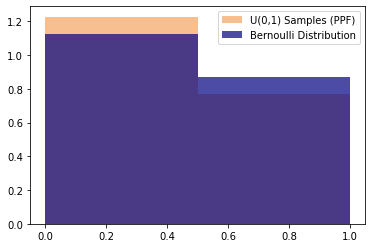

In [5]:
# simulate PPF
def simulateDiscrete(p):
    uniformArr = np.random.uniform(0,1,1000)
    newArr = np.zeros(1000)
    for i in range(0,1000):
        if uniformArr[i] < p:
            newArr[i] = 1
        else:
            newArr[i] = 0
    return newArr


ppfArr = simulateDiscrete(0.4)
bernDist = stats.bernoulli.rvs(size=1000,p=0.4)
plt.hist(ppfArr, 2, label='U(0,1) Samples (PPF)', density=True, color='sandybrown', alpha=0.7)
plt.hist(bernDist, 2, label='Bernoulli Distribution',density=True, color = 'navy', alpha=0.7)
plt.legend(loc='upper right')
plt.show()

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [20 points] Problem 2 - Exploring Confidence Intervals 

The [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution) distribution is one of several distributions frequently used to model event times, as it's the sum of exponentials.  It can also be fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gamma](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html).  (NB: check the links!)

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gamma distribution with parameters $k=4$ (a) and $\theta=10$ (scale).  Be sure to leave this cell executed before turning in your assignment! Make your histogram faces gray with blue edges.

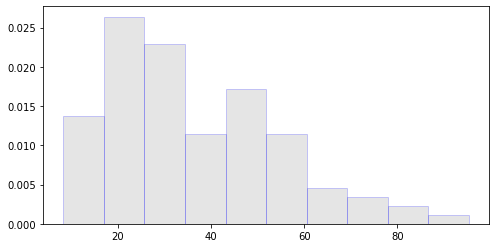

In [6]:
#GIVEN CODE (updated):
k = 4
theta = 10
n_sample = 100

x = stats.gamma.rvs(k,scale=theta,size=n_sample)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
ax.hist(x, density=True, fc='gray', ec='blue', alpha=0.2)
plt.show()


**Part B:** Look up the analytical mean and variance (from the documentation or wiki) of the Gamma distribution with parameters $k=4$ and $\theta=10$ and calculate them here by hand.

Use the empirical mean from your sample in **Part A**, and the true variance of the Gamma distribution to compute by hand a 95% confidence interval for the mean.

**Analytical Results in this cell.**  
The mean of the gamma distribution is $\mu = k\theta$, so the mean in this case is 40. The variance is $\sigma^2= k\theta^2.$ We use the population variance and the sample mean to create a confidence interval

In [7]:
#use sample mean and population 
x_bar = x.mean()
sd = np.sqrt(k * (theta**2))
print("The CI is: ",stats.norm.interval(.95, loc=x_bar, scale=sd/np.sqrt(n_sample)))
print("We are 95% confident that our interval contains the true mean of the gamma distribution.")

The CI is:  (32.708996677740245, 40.54885261590046)
We are 95% confident that our interval contains the true mean of the gamma distribution.


**Part C:  A theoretical interlude.** When Lola, the famous Beagle data scientist, ran her solution code for **Part B**, she obtained a 95% confidence interval of $[38.5, 40.5]$ for the mean of the $Gamma(k=4, \theta=10)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 95% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gamma(k=4, \theta=10)$ distribution, you could say there is a 95% chance that its true mean falls between 38.5 and 40.5.

**(ii)** If a class of 100 students all construct 95% confidence intervals for the mean of the $Gamma(k=4, \theta=10)$ distribution, then we expect about 95 of their CIs to contain the true mean, and about 5 of them to miss the true mean.

**(iii)** If we sample 100 random variables from the $Gamma(k=4, \theta=10)$ distribution, then roughly 95% of them will be between 38.5 and 40.5.

**Answer in this cell.**  
**(i)** No. We can only say that we are 95% **confident** that the true mean falls between 38.5 and 40.5.  
  
**(ii)** Yes. In repeated sampling, if the students individually sample 100 random variables and construct a confidence interval, 95% of the confidence intervals will contain the true mean, and 5% will miss the true mean.    
  
**(iii)** No. The confidence interval is for the true mean of the gamma distrubution, not individual values.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gamma distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gamma distribution with parameters $k=4$ and $\theta=10$.  For each random sample, compute the 66% confidence interval for the mean. Note that you actually know the variance for the true population distribution, $\sigma^2$ from Part B.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals steelblue if they cover the true mean, and coral if they don't.  

Be sure to leave this cell executed before turning in your assignment!

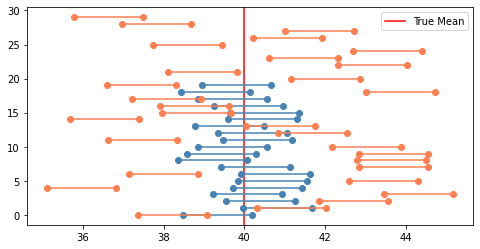

The proportion of confidence intervals that contain the true mean are: 34.0 %


In [8]:
# GIVEN CODE:
import random
def get_est():
    k = 4
    theta = 10
    x_bar = [0] * 500
    for i in range(0,500):    
        arr = stats.gamma.rvs(k,scale=theta,size=100)
        x_bar[i] = arr.mean()
    return x_bar

def get_interval(x_bar):
    sd = np.sqrt(4 * (10**2))
    lower,upper = stats.norm.interval(.66, loc=x_bar, scale=sd/np.sqrt(500))
    #print(lower,upper)
    return lower,upper
    
est = get_est()
x = random.sample(est,50)
dfIn = pd.DataFrame(data=None,columns=['Lower','Upper'])
dfOut = pd.DataFrame(data=None,columns=['Lower','Upper'])
j = 0
k = 0
count = 0
for l in range(0,500):
    lower,upper = get_interval(est[l])
    if lower <= 40 and upper >= 40:
        count += 1
for i in range(0,50):
    lower,upper = get_interval(x[i])
    if lower <= 40 and upper >= 40:
        dfIn.loc[j,'Lower'] = lower
        dfIn.loc[j,'Upper'] = upper
        j += 1
    else:
        dfOut.loc[k,'Lower'] = lower
        dfOut.loc[k,'Upper'] = upper
        k += 1
fig, ax = plt.subplots(figsize=(8,4))
ax.axvline(x=40,color='red',label='True Mean')
for lower,upper,y in zip(dfIn['Lower'],dfIn['Upper'],range(len(dfIn))):
    ax.plot((lower,upper),(y,y),'ro-',color='steelblue')
for lower,upper,y in zip(dfOut['Lower'],dfOut['Upper'],range(len(dfOut))):
    ax.plot((lower,upper),(y,y),'ro-',color='coral')
plt.legend(loc='upper right')
plt.show()
print("The proportion of confidence intervals that contain the true mean are:",count/500*100,"%")

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

**Answer in this cell.**  
Not really. 66% of the confidence intervals should contain the true mean, but this is not the case.

---

<a id='p3'></a>
[Back to top](#top)

### [20 points] Problem 3 - Lies, damned lies, and statistics

![frazz](http://3.bp.blogspot.com/-SbQUWRfHFXk/VdN8YWAy0WI/AAAAAAAAJLw/Ij5E0CbYk6g/s1600/lies3.gif)

Legend of your Data Science prowess has spread o'er the land. You have been contacted by a shadowy organization to assess whether there is statistical evidence for sea-level rise in the area of Honolulu, Hawaii. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file included in the zip folder for this assignment. The columns are, in order, the year, month, day-of-month and measured sea level (in millimeters).

**Part A:** Load the data `sealevel_honolulu.csv` into a Pandas DataFrame. Rename the columns as something meaningful in the context of this problem. Print to the screen the first 7 rows from your updated DataFrame.

In [9]:
# Path to the data - in the same directory as the homework file
file_path = 'sealevel_honolulu.csv'

# Load the data into a DataFrame 
df = pd.read_csv(file_path,header=None)
df.columns = ["Year", "Month", "Day", "Sea Level"]
df.head(7)

,Year,Month,Day,Sea Level
0,1905,1,2,1263
1,1905,1,3,1264
2,1905,1,4,1269
3,1905,1,5,1294
4,1905,1,6,1311
5,1905,1,7,1330
6,1905,1,8,1351


**Part B:**  Plot the raw time series of sea levels. Be sure to label your axes, including units. For the $x$-axis, place the $x$ tick marks on January 2 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

-32767


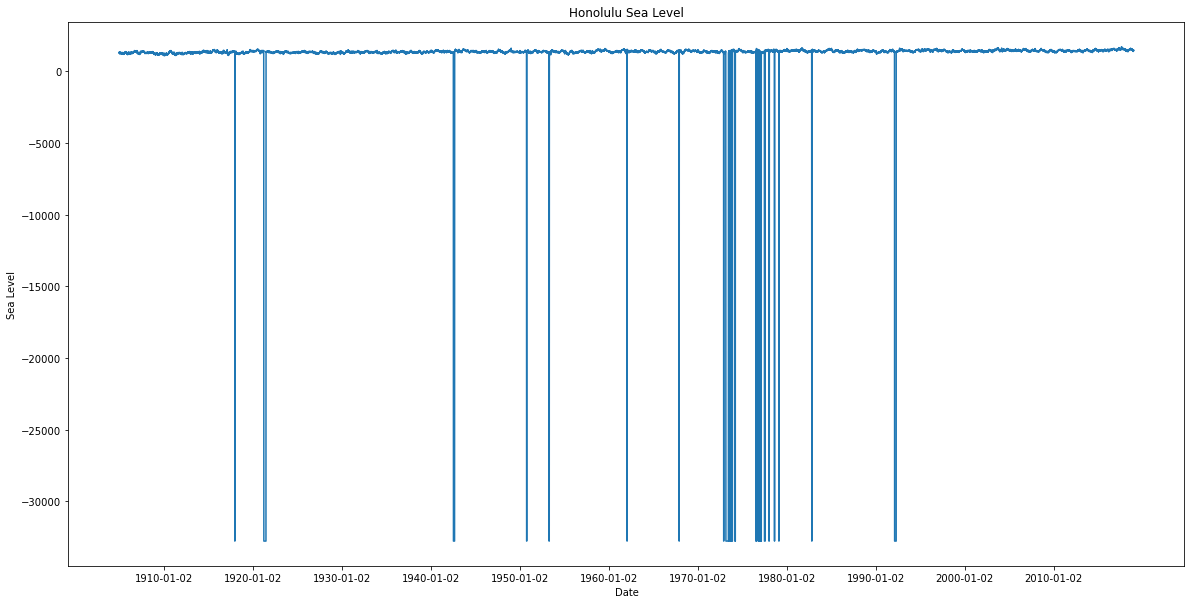

In [10]:
df['Date']=pd.to_datetime(df[['Month','Day','Year']])
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['Date'], df['Sea Level'])
ax.set(xlabel="Date", ylabel="Sea Level",title="Honolulu Sea Level")
boolDiv = df['Year'] % 10 == 0
boolJan = df['Month'] == 1
bool2 = df['Day'] == 2
df2 = df[boolDiv & boolJan &bool2]
listA = df2['Date'].to_numpy() 
ax.set_xticks(listA)
print(df['Sea Level'].min())

plt.show()

**Part C:** Your time series plot from Part B should look pretty funky. Namely, there are a bunch of spikes in it! What do you think these spikes represent?

Now, clean your data set by doing the following:
* Remove any data points associated with these spikes. You may need to look back to some of the earlier in-class notebooks and Pandas tutorials for how to drop data points from a Pandas DataFrame. 
* Include only the data point from the second day of each month.
* Convert the sea-level data from millimeters to feet.

Then, make a similar plot to Part B, but of your cleaned data set. Be sure to label axes (including units) and only label January 2 of each year that is divisible by 10.

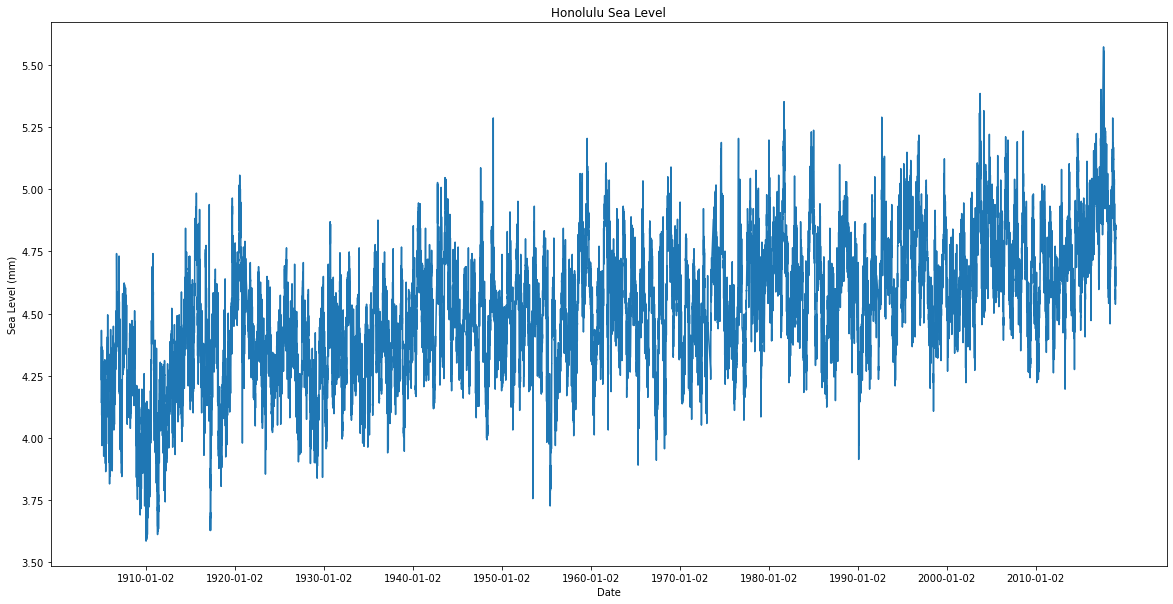

In [11]:
# dropping values less than 10000, multiply each value in Sea Level by 0.00328084 to convert to MM, get ticks
rmOut = df['Sea Level'] > -10000
df = df[rmOut]
df['Sea Level'] *= 0.00328084
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['Date'], df['Sea Level'])
ax.set(xlabel="Date", ylabel="Sea Level (mm)",title="Honolulu Sea Level")
boolDiv = df['Year'] % 10 == 0
boolJan = df['Month'] == 1
bool2 = df['Day'] == 2
df2 = df[boolDiv & boolJan &bool2]
listA = df2['Date'].to_numpy() 
ax.set_xticks(listA)
plt.show()

**Part D:** Your mysterious employer owns a lot of beachfront property in Hawaii and does not want to see people shy away from buying real estate and spending time near the sea. So, they really want to convince others to that the mean sea level in Honolulu in not increasing. Toward this end, your employer wants to find a decade of data (11 years, including both end points) that has a mean sea level which is not statistically significantly different from the mean sea level in the decade 2000-2010 (including data from both 2000 and 2010). Your employer wants you to use the 99% confidence/1% significance level because it sounds catchy in a press release, and wants the *earliest* decade possible.

Use your cleaned monthly data set from Part C to find the earliest decade for which you cannot conclude the mean sea level at Key West was statistically significantly different from the mean sea level in the 2000-2010 decade. You may want to write a helper function to compute the confidence intervals/perform the hypothesis test for you, because there are a LOT of possible 11-year periods to try. (*NOTE: The decade start / end years don't have to end with a 0. For example, 2008 - 2018 is the latest "decade" that exists in our dataset.*)

You may use either hypothesis tests or confidence intervals, but clearly state which method you will use, your results and show all work that leads to your conclusion. 

In [12]:
def getZ(start,end,n):
    stdev = df['Sea Level'].std()
    z = (end-start)/(stdev/np.sqrt(n))
    return z
def findDecade():
    #since the alt hyp is mu > startMean ,if z is less than or equal to za, we fail to reject the null
    #print(stdev)
    za = stats.norm.ppf(0.99)
    startDecade = df['Year'].min()
    endDecade = startDecade + 10
    #print(startDecade)
    #print(endDecade)
    loopBool = True
    while(loopBool):
        boolStart = df['Year']==startDecade
        boolEnd = df['Year'] == endDecade
        dfStart = df[boolStart]
        dfEnd = df[boolEnd]
        n = len(dfEnd)
        startMean = dfStart['Sea Level'].mean()
        endMean = dfEnd['Sea Level'].mean()
        z = getZ(startMean,endMean,n)
        if z <= za:
            loopBool = False
        else:
            startDecade += 1
            endDecade += 1
    return startDecade,endDecade
start,end = findDecade()
print("The earliest decade for which we cannot conclude that the mean sea level at Key West is statistically different from 10 years prior is",start,"-",end)

The earliest decade for which we cannot conclude that the mean sea level at Key West is statistically different from 10 years prior is 1907 - 1917


**Solution**
As shown above, the earliest decade for which we can conclude that the sea levels at Key West from the start of the decade are not statistically different from the end of the decade is 1907-1917. To find this decade, I used a hypothesis test where the null hypothesis was that $\mu\leq \text{average sea Level at 1907 (the start of the decade)}$ and the alternative hypothesis is that  $\mu>\text{average sea Level at 1907 (the end of the decade)}$. Since this is a right tailed test, to reject the null hypothesis, the z-value must be greater than $z_{.01}$, so we find the earliest decade where the opposite is true.